## Imports

In [ ]:
import cv2
from PIL import Image, ImageEnhance, ImageFilter
from PIL.ImageOps import invert

## Image preprocessing

In [2]:
test_image = 'test_image.jpg'

# convert to grayscale
img = Image.open(test_image).convert('L')

# invert image
img = invert(img)

# smoothen image
img = img.filter(ImageFilter.SMOOTH)

# increase contrast of image
img = ImageEnhance.Contrast(img).enhance(3)

# make all pixels below 200 black
img = img.point(lambda p: p > 240 and 255)

# show image
img.show()


## Inference

[         xmin         ymin        xmax         ymax  confidence  class  \
0  593.885193   496.863861  706.873657   656.987122    0.942196     13   
1  437.203033  1307.689819  569.098267  1402.219360    0.929877     13   
2  610.194336   754.740906  696.862915   996.069885    0.916854     12   
3  205.327072  1033.188965  310.719269  1158.852051    0.914612      4   
4  621.972351  1123.839478  716.856323  1227.262817    0.792412      9   
5  357.708740   351.795654  472.829010   450.928375    0.758466     14   
6  194.990204   498.289642  322.074280   693.601990    0.734472      6   
7  447.581848  1023.592773  543.850708  1038.822998    0.404871     12   

            name  
0       resistor  
1       resistor  
2       inductor  
3       curr_src  
4          diode  
5      voltmeter  
6  dc_volt_src_2  
7       inductor  ]


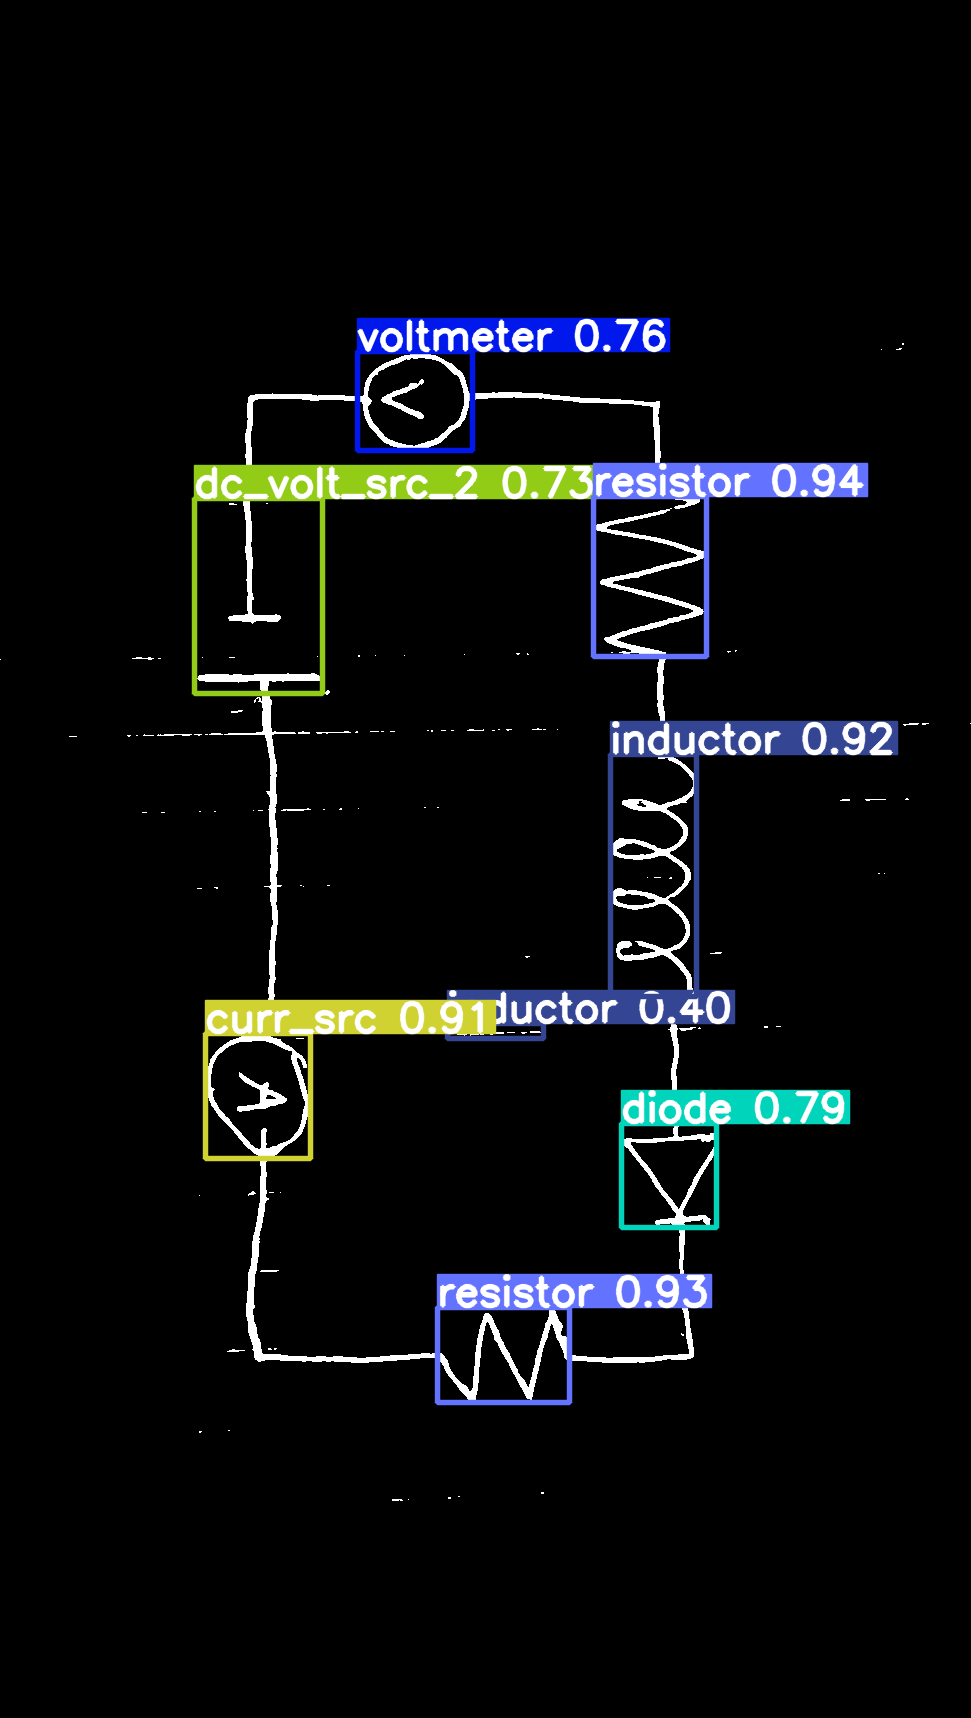

In [3]:
# get results
results = model(img)

# print results
print(results.pandas().xyxy)

# show results
results.show()

## Line detection

In [54]:
import numpy as np
# Remove pixels in bounding boxing from image
def remove_pixels(image, results):
    # get bounding boxes
    boxes = results.xyxy[0]

    # convert image to numpy array
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # remove pixels in bounding boxes
    for box in boxes:
        x1, y1, x2, y2 = map(int, box[0:4])  # Convert coordinates to integers
        image[y1:y2, x1:x2] = 0

    # convert image back to PIL image
    image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    return image

# remove pixels in bounding boxes
image = remove_pixels(img, results)

# # show image
# image.show()

In [55]:
# Run line detection on image
import cv2

# another_image = 'road_image.jpg'

# # load image
# image = Image.open(another_image)

# convert image to numpy array
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# find edges in image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# find lines in image
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=10, minLineLength=50, maxLineGap=10)

print(len(lines))

# draw lines on image
for points in lines:
    x1, y1, x2, y2 = points[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# convert image back to PIL image
image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# show image
image.show()

13
